Maximum matching

In [1]:
import networkx as nx
from networkx.algorithms import bipartite

def maximum_matching_bipartite_graph(G):
    """
    Return the maximum cardinality matching of a bipartite graph G.
    
    Parameters:
        G (networkx.Graph): Bipartite Graph
        
    Returns:
        (dictionary): Maximum cardinality matching
    """
    left_nodes, right_nodes = bipartite.sets(G)
    matching = nx.algorithms.matching.max_weight_matching(G)
    return matching

# Example Usage
G = nx.Graph()
G.add_nodes_from(['a', 'b', 'c'], bipartite=0) # Set the node attribute "bipartite" to 0 for nodes in one partition
G.add_nodes_from(['x', 'y'], bipartite=1) # Set the node attribute "bipartite" to 1 for nodes in the other partition
G.add_edges_from([('a', 'x'), ('a', 'y'), ('b', 'y'), ('c', 'x')])
maximum_matching = maximum_matching_bipartite_graph(G)
print(maximum_matching)


{('y', 'a'), ('c', 'x')}


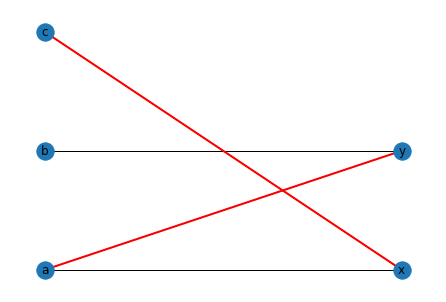

In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

def maximum_matching_bipartite_graph(G):
    """
    Return the maximum cardinality matching of a bipartite graph G.
    
    Parameters:
        G (networkx.Graph): Bipartite Graph
        
    Returns:
        (dictionary): Maximum cardinality matching
    """
    left_nodes, right_nodes = bipartite.sets(G)
    matching = nx.algorithms.matching.max_weight_matching(G)
    return matching

# Example Usage
G = nx.Graph()
G.add_nodes_from(['a', 'b', 'c'], bipartite=0) # Set the node attribute "bipartite" to 0 for nodes in one partition
G.add_nodes_from(['x', 'y'], bipartite=1) # Set the node attribute "bipartite" to 1 for nodes in the other partition
G.add_edges_from([('a', 'x'), ('a', 'y'), ('b', 'y'), ('c', 'x')])

# Compute maximum matching
maximum_matching = maximum_matching_bipartite_graph(G)

# Draw bipartite graph
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(['a', 'b', 'c']) ) # positions for left nodes
pos.update( (n, (2, i)) for i, n in enumerate(['x', 'y']) ) # positions for right nodes
nx.draw(G, pos=pos, with_labels=True)

# Highlight matched edges
matched_edges = [(u, v) for u, v in maximum_matching]
nx.draw_networkx_edges(G, pos, edgelist=matched_edges, edge_color='r', width=2)

plt.show()


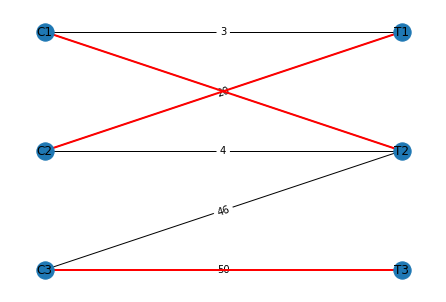

In [5]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

def maximum_matching_bipartite_graph(G):
    """
    Return the maximum cardinality matching of a bipartite graph G.
    
    Parameters:
        G (networkx.Graph): Bipartite Graph
        
    Returns:
        (dictionary): Maximum cardinality matching
    """
    left_nodes, right_nodes = bipartite.sets(G)
    matching_edges = nx.algorithms.matching.max_weight_matching(G, weight='weight')
    # Convert matching from list of edges to dictionary format
    matching_dict = dict()
    for u, v in matching_edges:
        matching_dict[u] = v
    return matching_dict

# Example Usage
G = nx.Graph()
G.add_nodes_from(['C1', 'C2', 'C3'], bipartite=0) # Set the node attribute "bipartite" to 0 for nodes in one partition
G.add_nodes_from(['T1', 'T2', 'T3'], bipartite=1) # Set the node attribute "bipartite" to 1 for nodes in the other partition
G.add_weighted_edges_from([('C1', 'T1', 3), ('C1', 'T2', 5),\
                           ('C2', 'T1', 20), ('C2', 'T2', 4),\
                           ('C3', 'T2', 46), ('C3', 'T3', 50)])

# Compute maximum matching
maximum_matching = maximum_matching_bipartite_graph(G)

# Draw bipartite graph
pos = dict()
pos.update( (n, (1, 4-i)) for i, n in enumerate(['C1', 'C2', 'C3']) ) # positions for left nodes
pos.update( (n, (2, 4-i)) for i, n in enumerate(['T1', 'T2', 'T3']) ) # positions for right nodes

# Get edge labels
edge_labels = dict([((u, v), d['weight']) for u, v, d in G.edges(data=True)])

nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=10)

# Highlight matched edges
matched_edges = [(u, v) for u, v in maximum_matching.items()]
nx.draw_networkx_edges(G, pos, edgelist=matched_edges, edge_color='r', width=2)

plt.show()
